Avviare l'env:<br>
cd .env<br>
source bin/activate

Disattivarlo:
deactivate

-------------------------------------

    

In [1]:
import os
import pandas as pd
from functions_grafo import *
from ricerca_locale import *

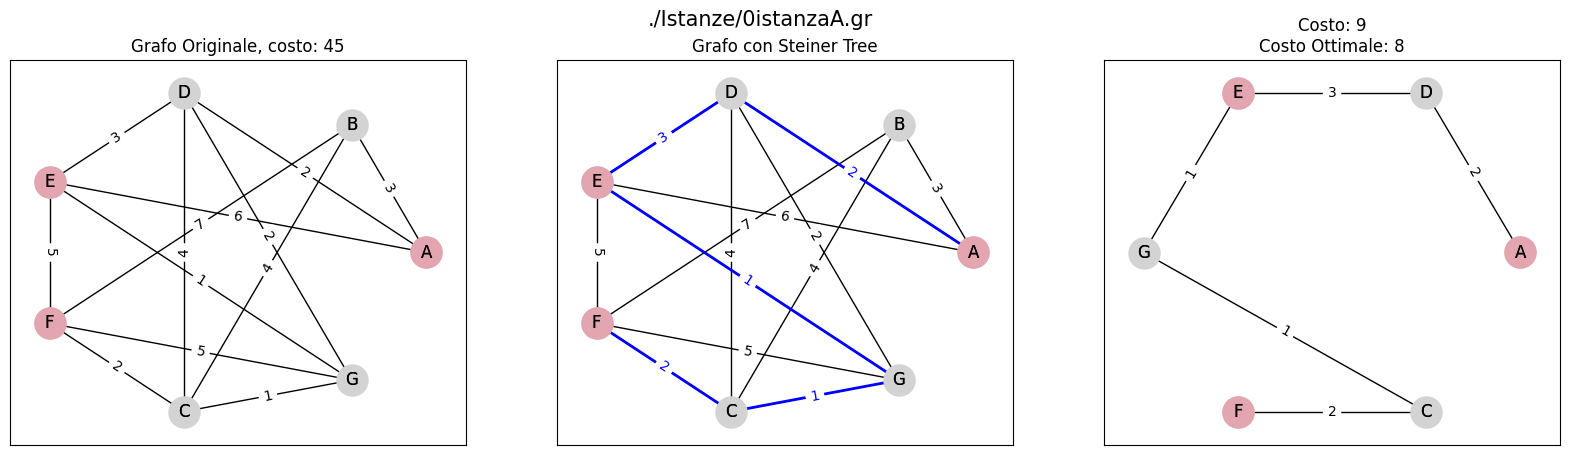

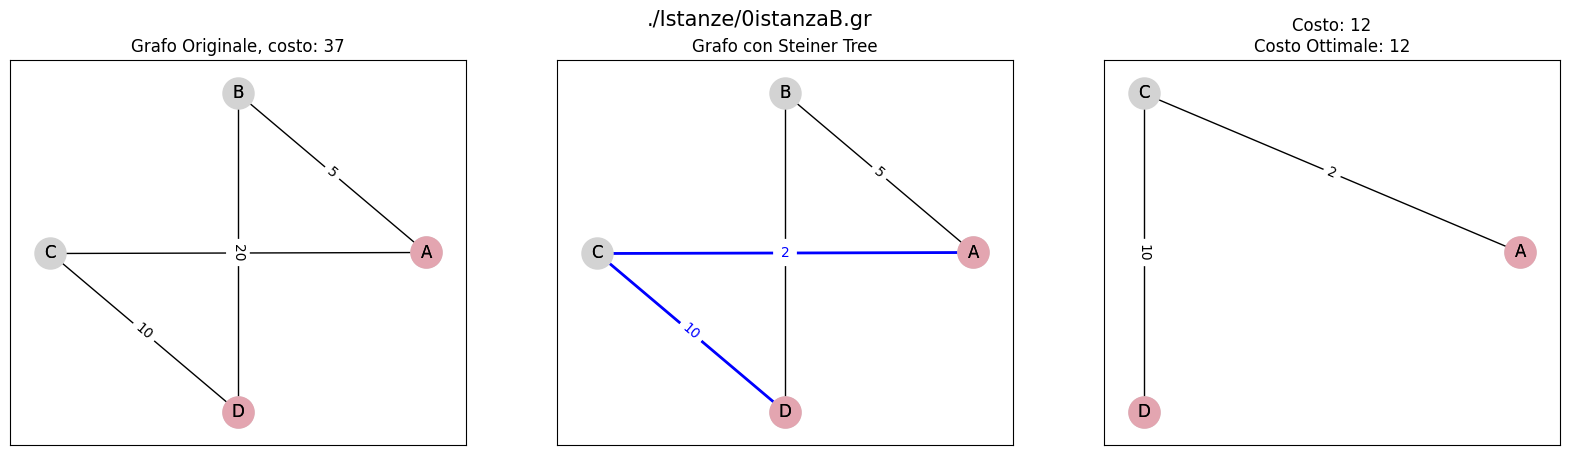

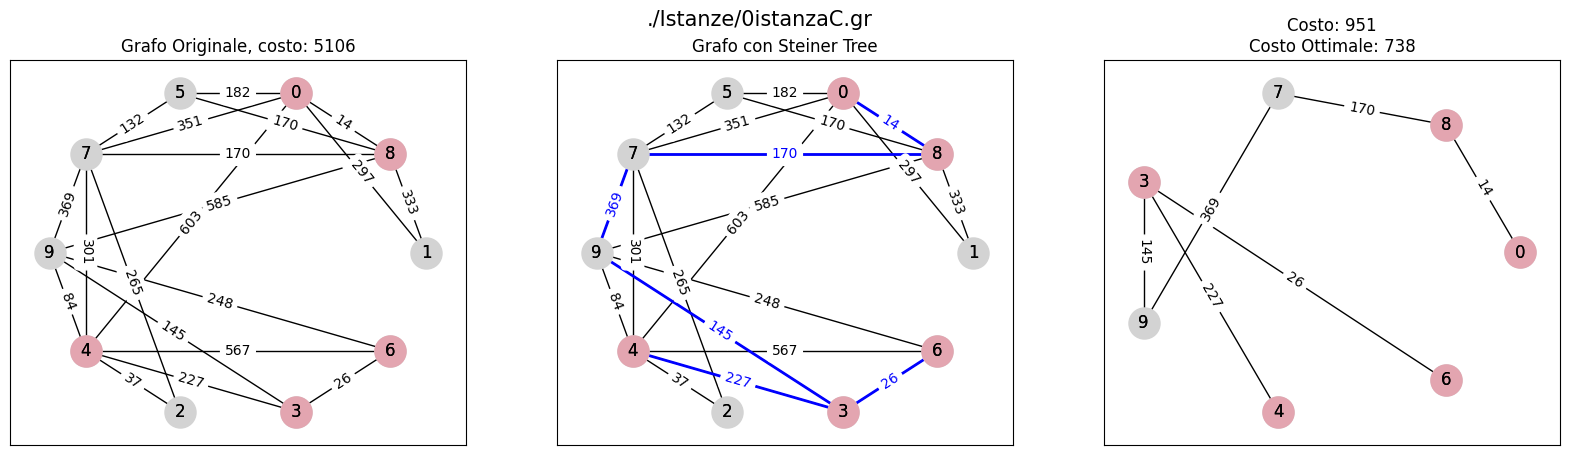

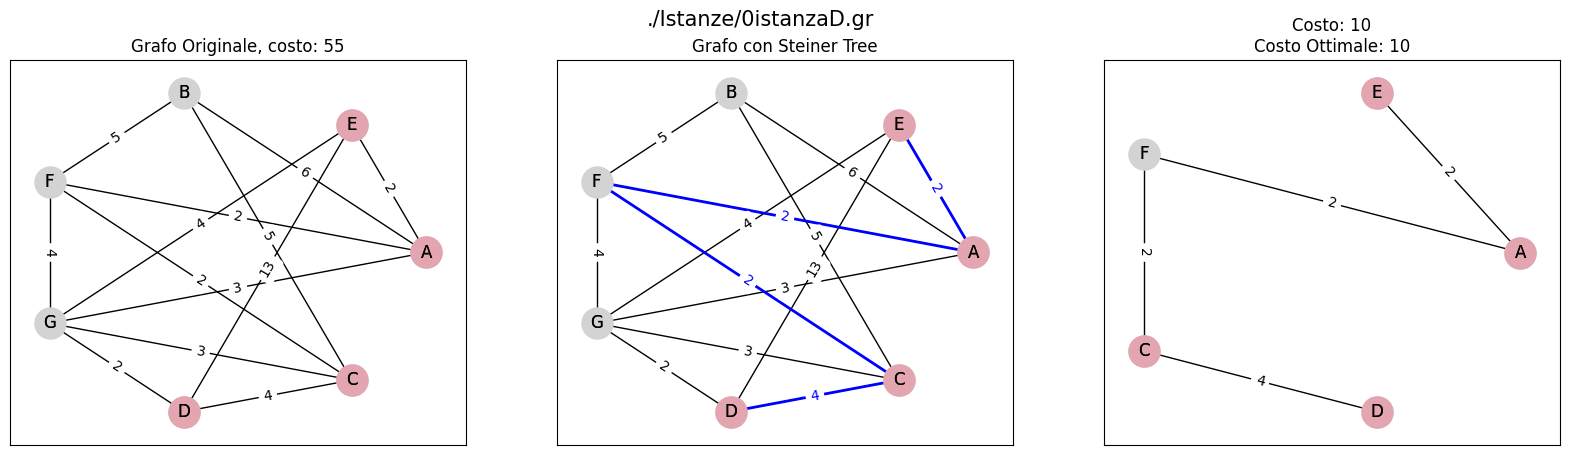

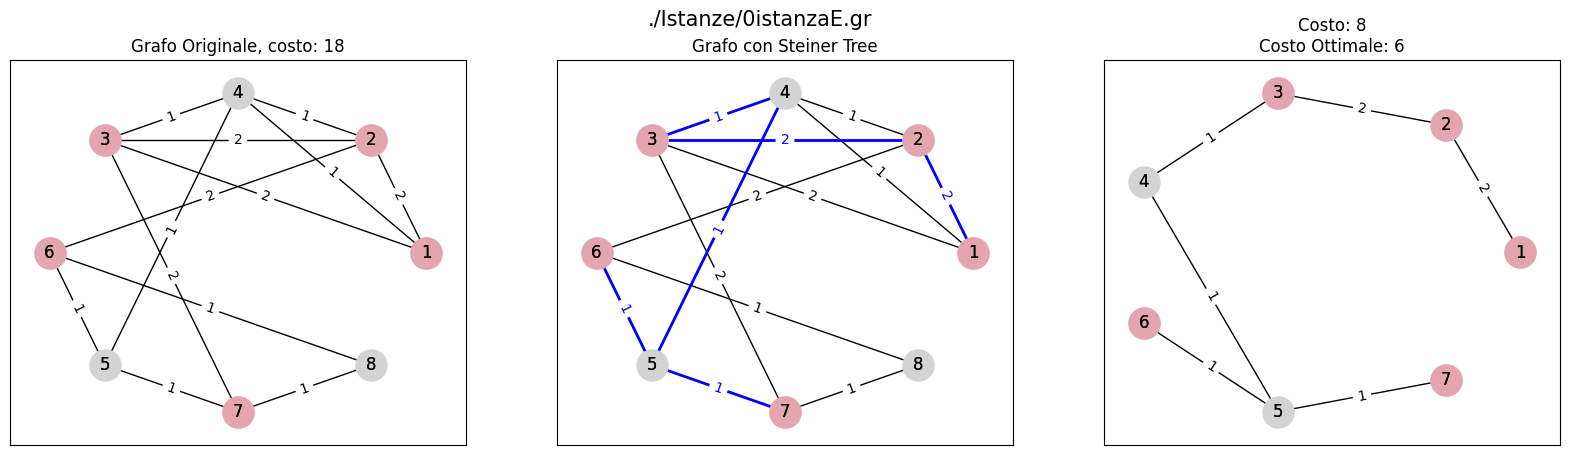

In [2]:
#PROVE DEI RISULTATI OTTENUTI applicando l'euristica0: NAIVE
#Lettura delle istanze da file ed esecuzione
file_path = "./Istanze/0istanzaA.gr" 
grafo = create_graph(file_path)
steiner_tree, timeS = naive(grafo)
draw_row_graph(file_path,grafo,steiner_tree)


file_path = "./Istanze/0istanzaB.gr" 
grafo1 = create_graph(file_path)
steiner_tree1, timeS = naive(grafo1)
draw_row_graph(file_path,grafo1,steiner_tree1)

file_path = "./Istanze/0istanzaC.gr" 
grafo2 = create_graph(file_path)
steiner_tree2, timeS = naive(grafo2)
draw_row_graph(file_path,grafo2,steiner_tree2)

file_path = "./Istanze/0istanzaD.gr" 
grafo3 = create_graph(file_path)
steiner_tree3, timeS = naive(grafo3)
draw_row_graph(file_path,grafo3,steiner_tree3)

file_path = "./Istanze/0istanzaE.gr" 
grafoE = create_graph(file_path)
steiner_treeE, timeS = naive(grafoE)
draw_row_graph(file_path,grafoE,steiner_treeE)



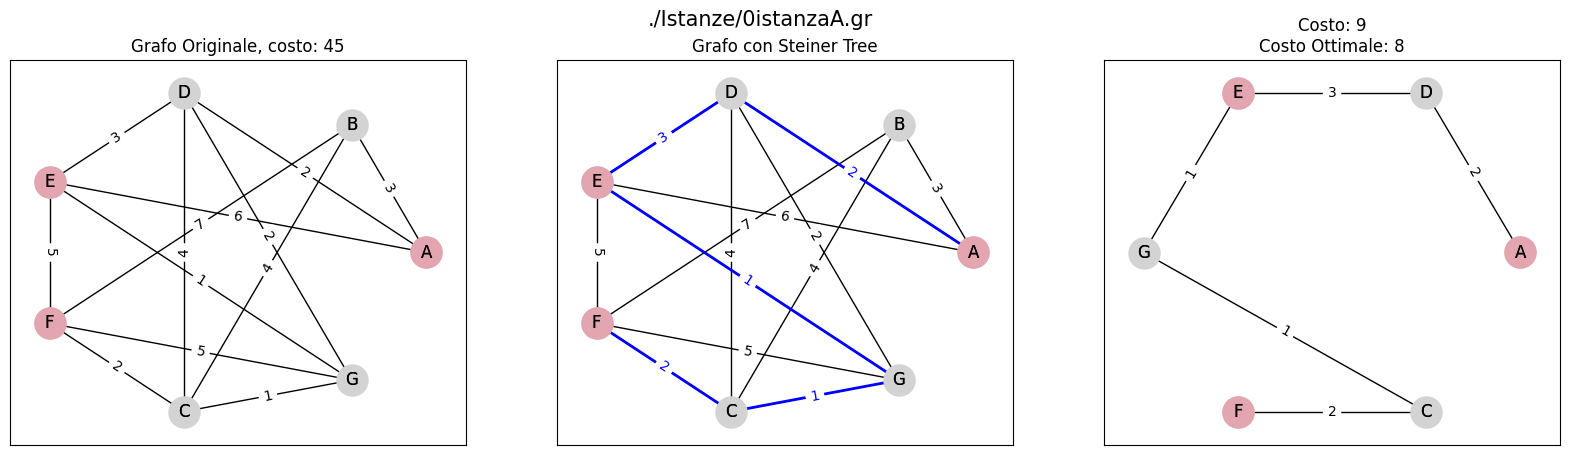

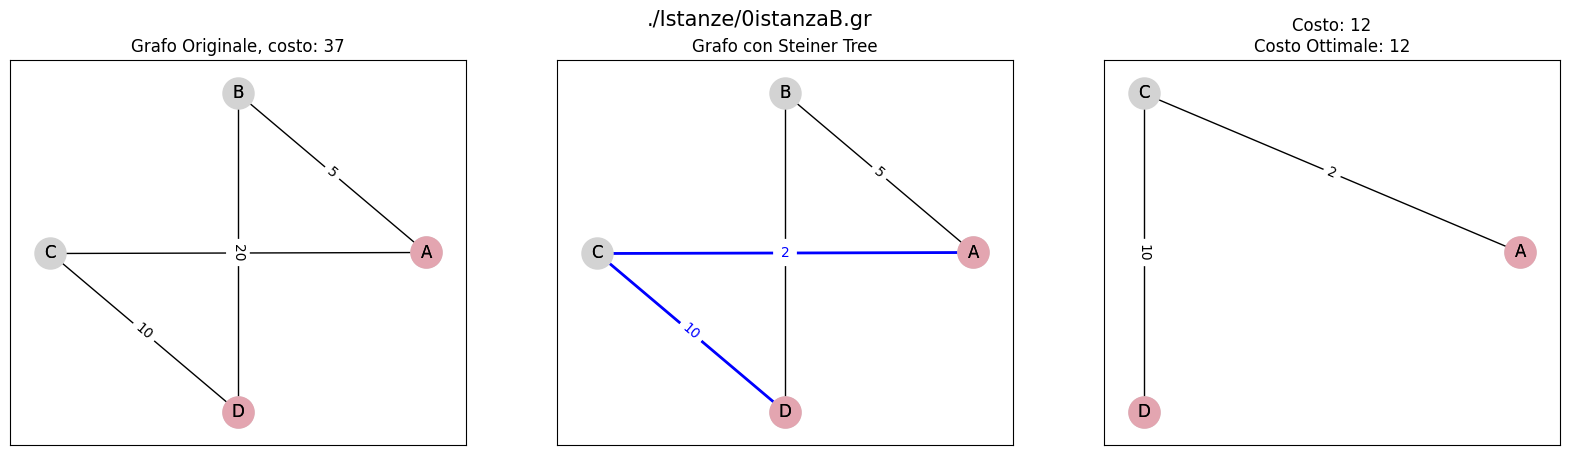

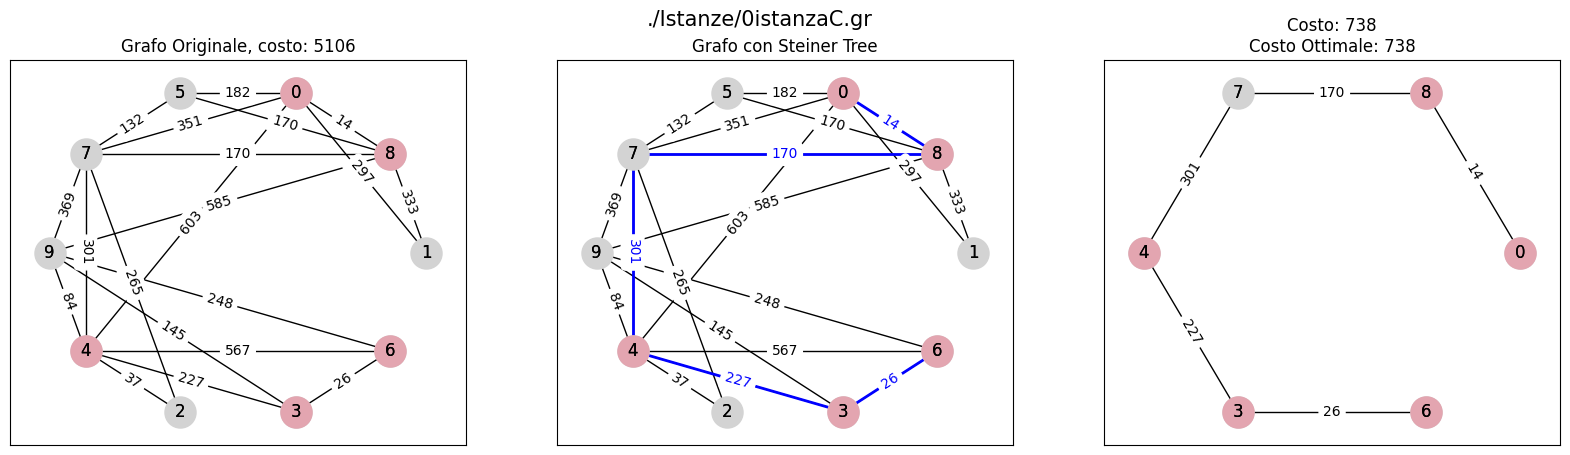

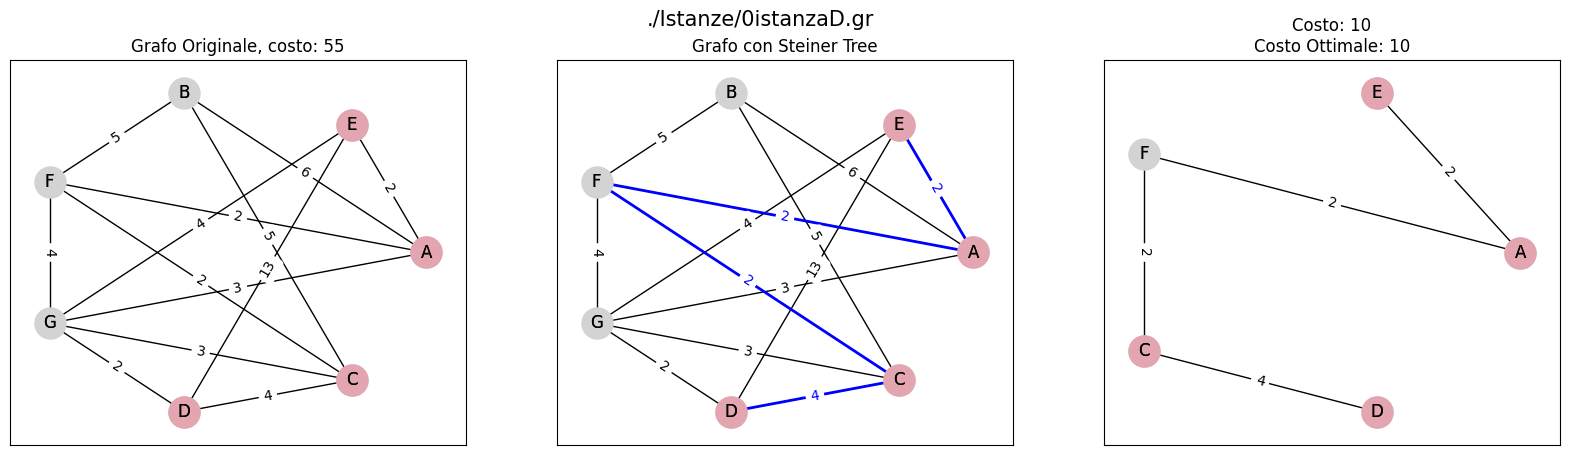

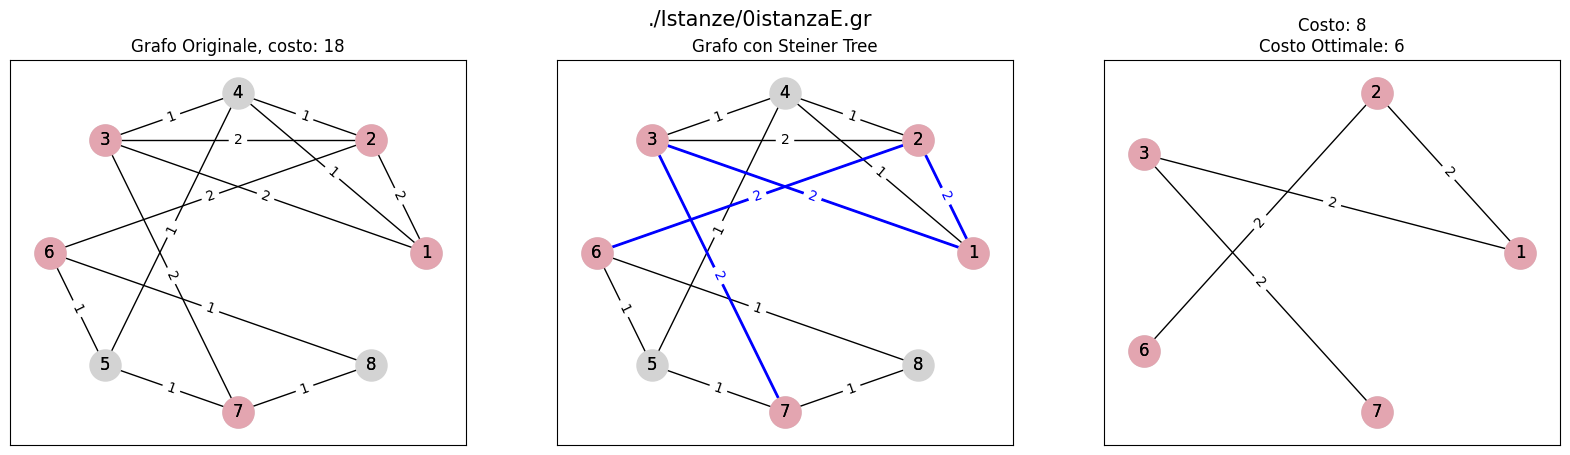

In [3]:
#PROVE DEI RISULTATI OTTENUTI applicando l'euristica1: shortest path

#Lettura delle istanze da file ed esecuzione
file_path = "./Istanze/0istanzaA.gr" 
grafo = create_graph(file_path)
steiner_tree, timeS = shortest_path(grafo)
draw_row_graph(file_path,grafo,steiner_tree)


file_path = "./Istanze/0istanzaB.gr" 
grafo1 = create_graph(file_path)
steiner_tree1, timeS = shortest_path(grafo1)
draw_row_graph(file_path,grafo1,steiner_tree1)

file_path = "./Istanze/0istanzaC.gr" 
grafo2 = create_graph(file_path)
steiner_tree2, timeS = shortest_path(grafo2)
draw_row_graph(file_path,grafo2,steiner_tree2)

file_path = "./Istanze/0istanzaD.gr" 
grafo3 = create_graph(file_path)
steiner_tree3, timeS = shortest_path(grafo3)
draw_row_graph(file_path,grafo3,steiner_tree3)

file_path = "./Istanze/0istanzaE.gr" 
grafoE = create_graph(file_path)
steiner_treeE, timeS = shortest_path(grafoE)
draw_row_graph(file_path,grafoE,steiner_treeE)



In [4]:
#Valutazione su tutte le istanze presenti dell'euristica0: NAIVE
data_naive = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Costo_Steiner_naive':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'Time(s)':[]
}

directory = './Istanze/'

# Iterate over all files in the directory
for filename in sorted(os.listdir(directory)):
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    #print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    steiner_tree, timeS = naive(grafo)
    
    #Aggiungo i risultati
    data_naive['Nome'].append(filename.split('.')[0])
    data_naive['Num_Vertici'].append(grafo.get_num_vertices())
    data_naive['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data_naive['Num_Archi'].append(grafo.get_num_edges())
    data_naive['Num_Vertici_Steiner'].append(steiner_tree.get_num_vertices())
    data_naive['Num_Archi_Steiner'].append(steiner_tree.get_num_edges())
    costo_albero_minimo = steiner_tree.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    data_naive['Costo_Steiner_naive'].append(costo_albero_minimo)
    data_naive['Costo_Ottimale'].append(ottimo)
    data_naive['Differenza_ottimo'].append(difference)
    data_naive['Time(s)'].append(timeS)
    

df = pd.DataFrame(data_naive).set_index('Nome')
df = df.sort_index()
pd.set_option('display.max_columns', None)  # Imposta la larghezza massima delle colonne a None
pd.set_option('display.expand_frame_repr', False) 

# Print the table
print("Risultati ottenuti applicando l'euristica0: NAIVE")
print(df)

Risultati ottenuti applicando l'euristica0: NAIVE
              Num_Vertici  Num_Terminals  Num_Archi  Num_Vertici_Steiner  Num_Archi_Steiner  Costo_Steiner_naive Costo_Ottimale  Differenza_ottimo   Time(s)
Nome                                                                                                                                                        
0istanzaA               7              3         13                    6                  5                    9              8                  1  0.000047
0istanzaB               4              2          4                    3                  2                   12             12                  0  0.000014
0istanzaC              10              5         20                    7                  6                  951            738                213  0.000057
0istanzaD               7              4         13                    5                  4                   10             10                  0  0.000033
0istanza

In [5]:
#Valutazione su tutte le istanze presenti dell'euristica1: shortest path
data = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Costo_Steiner_shortest':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'Time(s)':[],
}

directory = './Istanze/'

# Iterate over all files in the directory
for filename in sorted(os.listdir(directory)):
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    #print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    steiner_tree, timeS = shortest_path(grafo)
    
    #Aggiungo i risultati
    data['Nome'].append(filename.split('.')[0])
    data['Num_Vertici'].append(grafo.get_num_vertices())
    data['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data['Num_Archi'].append(grafo.get_num_edges())
    data['Num_Vertici_Steiner'].append(steiner_tree.get_num_vertices())
    data['Num_Archi_Steiner'].append(steiner_tree.get_num_edges())
    costo_albero_minimo = steiner_tree.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    data['Costo_Steiner_shortest'].append(costo_albero_minimo)
    data['Costo_Ottimale'].append(ottimo)
    data['Differenza_ottimo'].append(difference)
    data['Time(s)'].append(timeS)
    

df = pd.DataFrame(data).set_index('Nome')
df = df.sort_index()
pd.set_option('display.max_columns', None)  # Imposta la larghezza massima delle colonne a None
pd.set_option('display.expand_frame_repr', False) 


# Print the table
print("risultati ottenuti applicando l'euristica1: SHORTEST PATH")
print(df)

risultati ottenuti applicando l'euristica1: SHORTEST PATH
              Num_Vertici  Num_Terminals  Num_Archi  Num_Vertici_Steiner  Num_Archi_Steiner  Costo_Steiner_shortest Costo_Ottimale  Differenza_ottimo    Time(s)
Nome                                                                                                                                                            
0istanzaA               7              3         13                    6                  5                       9              8                  1   0.000154
0istanzaB               4              2          4                    3                  2                      12             12                  0   0.000026
0istanzaC              10              5         20                    6                  5                     738            738                  0   0.000269
0istanzaD               7              4         13                    5                  4                      10             10       

COSTO FINALE: 8
VERTICI FINALE: ['A', 'E', 'F', 'C', 'G', 'D']
ARCHI FINALE: [('A', 'D'), ('E', 'G'), ('F', 'C'), ('C', 'G'), ('G', 'D')]
numero iterazioni: 2


Text(0.5, 1.0, 'Soluzione finale con LS')

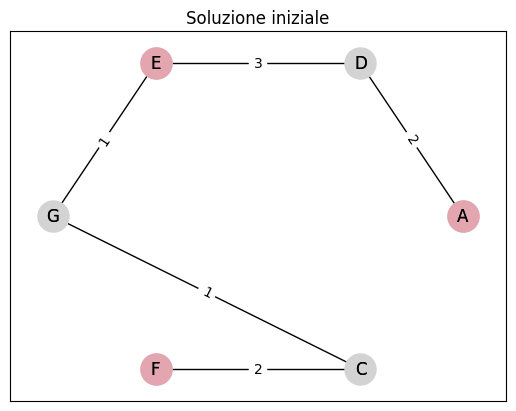

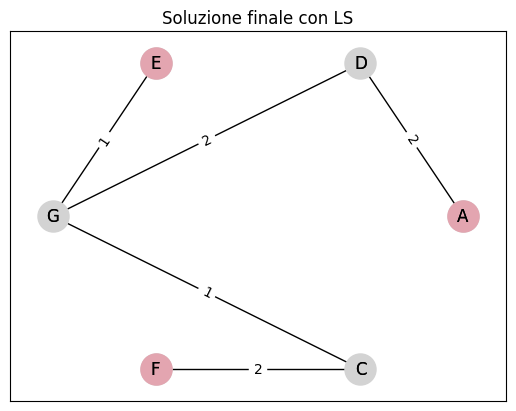

In [6]:
#Prima prova di ricerca Locale
file_path = "./Istanze/0istanzaA.gr" 
grafo = create_graph(file_path)
steiner_tree, timeS = shortest_path(grafo)
costo = steiner_tree.calculate_cost()
plt.figure()
steiner_tree.draw_graph()
plt.title("Soluzione iniziale")
best_solution, best_solution_cost, k, _ = local_search(grafo, steiner_tree, costo)
print("COSTO FINALE:", best_solution_cost)
print("VERTICI FINALE:", best_solution.get_vertices())
print("ARCHI FINALE:", remove_duplicate(best_solution.get_edges()))
print("numero iterazioni:", k)
plt.figure()
best_solution.draw_graph()
plt.title("Soluzione finale con LS")



In [7]:
#Valutazione su tutte le istanze presenti della ricerca locale
data_ls_naive = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Costo_con_euristica': data_naive['Costo_Steiner_naive'],
    'Costo_LS':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'k':[],
    'Time(s)':[],
}

directory = './Istanze/'

# Iterate over all files in the directory
for filename in sorted(os.listdir(directory)):
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    #print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    sol_iniziale, _ = naive(grafo)
    best_solution, best_solution_cost, k, timeLS = local_search(grafo, sol_iniziale, sol_iniziale.calculate_cost())
    
    
    #Aggiungo i risultati
    data_ls_naive['Nome'].append(filename.split('.')[0])
    data_ls_naive['Num_Vertici'].append(grafo.get_num_vertices())
    data_ls_naive['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data_ls_naive['Num_Archi'].append(grafo.get_num_edges())
    data_ls_naive['Num_Vertici_Steiner'].append(best_solution.get_num_vertices())
    data_ls_naive['Num_Archi_Steiner'].append(best_solution.get_num_edges())
    costo_albero_minimo = best_solution.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    data_ls_naive['Costo_LS'].append(costo_albero_minimo)
    data_ls_naive['Costo_Ottimale'].append(ottimo)
    data_ls_naive['Differenza_ottimo'].append(difference)
    data_ls_naive['k'].append(k)
    data_ls_naive['Time(s)'].append(timeLS)
    
df1 = pd.DataFrame(data_ls_naive).set_index('Nome')
df1 = df1.sort_index()
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False) 


# Print the table
print("Valutazione risultati naive + ricerca locale first improvement")
print(df1)


Valutazione risultati naive + ricerca locale first improvement
              Num_Vertici  Num_Terminals  Num_Archi  Num_Vertici_Steiner  Num_Archi_Steiner  Costo_con_euristica   Costo_LS Costo_Ottimale  Differenza_ottimo   k     Time(s)
Nome                                                                                                                                                                         
0istanzaA               7              3         13                    6                  5                    9          8              8                  0   2    0.001339
0istanzaB               4              2          4                    3                  2                   12         12             12                  0   1    0.000173
0istanzaC              10              5         20                    6                  5                  951        738            738                  0   2    0.000947
0istanzaD               7              4         13                

In [8]:
#Valutazione su tutte le istanze presenti della ricerca locale
data_ls_short = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Costo_con_euristica': data['Costo_Steiner_shortest'],
    'Costo_LS':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'k':[],
    'Time(s)':[],
}

directory = './Istanze/'

# Iterate over all files in the directory
for filename in sorted(os.listdir(directory)):
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    #print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    sol_iniziale, _ = shortest_path(grafo)
    best_solution, best_solution_cost, k, timeLS = local_search(grafo, sol_iniziale, sol_iniziale.calculate_cost())
    
    
    #Aggiungo i risultati
    data_ls_short['Nome'].append(filename.split('.')[0])
    data_ls_short['Num_Vertici'].append(grafo.get_num_vertices())
    data_ls_short['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data_ls_short['Num_Archi'].append(grafo.get_num_edges())
    data_ls_short['Num_Vertici_Steiner'].append(best_solution.get_num_vertices())
    data_ls_short['Num_Archi_Steiner'].append(best_solution.get_num_edges())
    costo_albero_minimo = best_solution.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    data_ls_short['Costo_LS'].append(costo_albero_minimo)
    data_ls_short['Costo_Ottimale'].append(ottimo)
    data_ls_short['Differenza_ottimo'].append(difference)
    data_ls_short['k'].append(k)
    data_ls_short['Time(s)'].append(timeLS)
    
df1 = pd.DataFrame(data_ls_short).set_index('Nome')
df1 = df1.sort_index()
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False) 


# Print the table
print("Valutazione risultati shortest path + ricerca locale first improvement")
print(df1)


Valutazione risultati shortest path + ricerca locale first improvement
              Num_Vertici  Num_Terminals  Num_Archi  Num_Vertici_Steiner  Num_Archi_Steiner  Costo_con_euristica   Costo_LS Costo_Ottimale  Differenza_ottimo   k     Time(s)
Nome                                                                                                                                                                         
0istanzaA               7              3         13                    6                  5                    9          8              8                  0   2    0.000756
0istanzaB               4              2          4                    3                  2                   12         12             12                  0   1    0.000122
0istanzaC              10              5         20                    6                  5                  738        738            738                  0   1    0.000471
0istanzaD               7              4         13        

COSTO FINALE: 8
VERTICI FINALE: ['A', 'E', 'F', 'C', 'G', 'D']
ARCHI FINALE: [('A', 'D'), ('E', 'G'), ('F', 'C'), ('C', 'G'), ('G', 'D')]
numero iterazioni: 2


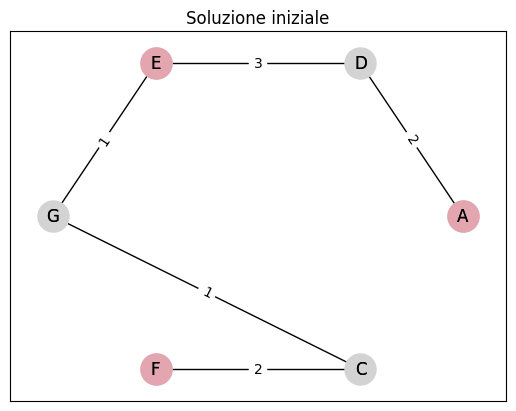

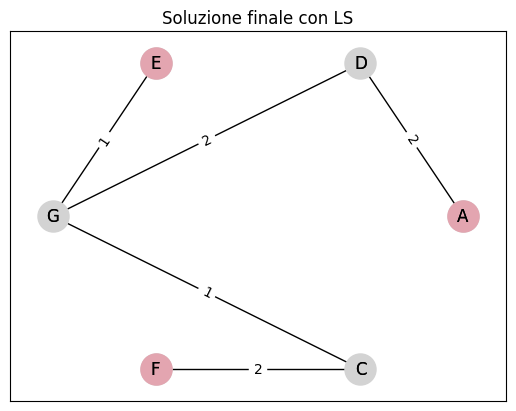

In [9]:
#Prima prova di ricerca Locale
file_path = "./Istanze/0istanzaA.gr" 
grafo = create_graph(file_path)
steiner_tree, timeS = shortest_path(grafo)
costo = steiner_tree.calculate_cost()
plt.figure()
steiner_tree.draw_graph()
plt.title("Soluzione iniziale")
best_solution, best_solution_cost, k, _ = local_search_best_improvment(grafo, steiner_tree, costo)
print("COSTO FINALE:", best_solution_cost)
print("VERTICI FINALE:", best_solution.get_vertices())
print("ARCHI FINALE:", remove_duplicate(best_solution.get_edges()))
print("numero iterazioni:", k)
plt.figure()
plt.title("Soluzione finale con LS")
best_solution.draw_graph()




In [10]:
#Valutazione su tutte le istanze presenti della ricerca locale best improvmnet
data_ls_best = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Costo_con_euristica': data_naive['Costo_Steiner_naive'],
    'Costo_LS':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'k':[],
    'Time(s)':[],
}

directory = './Istanze/'

c = 0
# Iterate over all files in the directory
for filename in sorted(os.listdir(directory)):
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    #print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    sol_iniziale, _ = naive(grafo)
    best_solution, best_solution_cost, k, timeLS = local_search_best_improvment(grafo, sol_iniziale, sol_iniziale.calculate_cost())
    
    
    #Aggiungo i risultati
    data_ls_best['Nome'].append(filename.split('.')[0])
    data_ls_best['Num_Vertici'].append(grafo.get_num_vertices())
    data_ls_best['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data_ls_best['Num_Archi'].append(grafo.get_num_edges())
    data_ls_best['Num_Vertici_Steiner'].append(best_solution.get_num_vertices())
    data_ls_best['Num_Archi_Steiner'].append(best_solution.get_num_edges())
    costo_albero_minimo = best_solution.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    data_ls_best['Costo_LS'].append(costo_albero_minimo)
    data_ls_best['Costo_Ottimale'].append(ottimo)
    data_ls_best['Differenza_ottimo'].append(difference)
    data_ls_best['k'].append(k)
    data_ls_best['Time(s)'].append(timeLS)
    
df2 = pd.DataFrame(data_ls_best).set_index('Nome')
df2 = df2.sort_index()
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False) 


# Print the table
print("Valutazione risultati naive + ricerca locale best improvement")
print(df2)


Valutazione risultati naive + ricerca locale best improvement
              Num_Vertici  Num_Terminals  Num_Archi  Num_Vertici_Steiner  Num_Archi_Steiner  Costo_con_euristica   Costo_LS Costo_Ottimale  Differenza_ottimo   k      Time(s)
Nome                                                                                                                                                                          
0istanzaA               7              3         13                    6                  5                    9          8              8                  0   2     0.002411
0istanzaB               4              2          4                    3                  2                   12         12             12                  0   1     0.000277
0istanzaC              10              5         20                    6                  5                  951        738            738                  0   2     0.003033
0istanzaD               7              4         13            

In [11]:
#Valutazione su tutte le istanze presenti della ricerca locale
data_ls_short_best = {
    'Nome': [],
    'Num_Vertici': [],
    'Num_Terminals': [],
    'Num_Archi': [],
    'Num_Vertici_Steiner': [],
    'Num_Archi_Steiner': [],
    'Costo_con_euristica': data['Costo_Steiner_shortest'],
    'Costo_LS':[],
    'Costo_Ottimale':[],
    'Differenza_ottimo':[],
    'k':[],
    'Time(s)':[],
}

directory = './Istanze/'

# Iterate over all files in the directory
for filename in sorted(os.listdir(directory)):
    #Prendo i nomi dei file
    file_path = os.path.join(directory, filename)
    #print(file_path)
    #Calcolo i valori
    grafo = create_graph(file_path)
    sol_iniziale, _ = shortest_path(grafo)
    best_solution, best_solution_cost, k, timeLS = local_search_best_improvment(grafo, sol_iniziale, sol_iniziale.calculate_cost())
    
    
    #Aggiungo i risultati
    data_ls_short_best['Nome'].append(filename.split('.')[0])
    data_ls_short_best['Num_Vertici'].append(grafo.get_num_vertices())
    data_ls_short_best['Num_Terminals'].append(grafo.get_num_vertices_steiner())
    data_ls_short_best['Num_Archi'].append(grafo.get_num_edges())
    data_ls_short_best['Num_Vertici_Steiner'].append(best_solution.get_num_vertices())
    data_ls_short_best['Num_Archi_Steiner'].append(best_solution.get_num_edges())
    costo_albero_minimo = best_solution.calculate_cost()
    ottimo = grafo.get_optimal_cost_steiner_tree()
    difference = int(costo_albero_minimo) - int(ottimo)
    data_ls_short_best['Costo_LS'].append(costo_albero_minimo)
    data_ls_short_best['Costo_Ottimale'].append(ottimo)
    data_ls_short_best['Differenza_ottimo'].append(difference)
    data_ls_short_best['k'].append(k)
    data_ls_short_best['Time(s)'].append(timeLS)
    
df2_short = pd.DataFrame(data_ls_short_best).set_index('Nome')
df2_short = df2_short.sort_index()
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False) 


# Print the table
print("Valutazione risultati shortest path + ricerca locale best improvement")
print(df2_short)


Valutazione risultati shortest path + ricerca locale best improvement
              Num_Vertici  Num_Terminals  Num_Archi  Num_Vertici_Steiner  Num_Archi_Steiner  Costo_con_euristica   Costo_LS Costo_Ottimale  Differenza_ottimo   k     Time(s)
Nome                                                                                                                                                                         
0istanzaA               7              3         13                    6                  5                    9          8              8                  0   2    0.001333
0istanzaB               4              2          4                    3                  2                   12         12             12                  0   1    0.000281
0istanzaC              10              5         20                    6                  5                  738        738            738                  0   1    0.000561
0istanzaD               7              4         13         

In [27]:
print("Costo con euristica naive, costo con euristica shortest path, costo LS naive FI, costo LS shortest path FI, costo LS naive BEST, costo LS shortest path BEST")
i = 0
migliore_first_naive = 0
migliore_first_short = 0
migliore_best_naive = 0
migliore_best_short = 0
ottimo_first_naive = 0
ottimo_first_short = 0
ottimo_best_naive = 0
ottimo_best_short = 0

for i in range(0, len(data_ls_short['Differenza_ottimo'])):
    first_naive = int(data_ls_naive['Differenza_ottimo'][i])
    first_short = int(data_ls_short['Differenza_ottimo'][i])
    best_naive = int(data_ls_best['Differenza_ottimo'][i])
    best_short = int(data_ls_short_best['Differenza_ottimo'][i])
    
    print(data_naive['Nome'][i],data_naive['Differenza_ottimo'][i], data['Differenza_ottimo'][i],"----", first_naive, first_short, best_naive, best_short)
    if first_naive < first_short and first_naive < best_naive and first_naive < best_short:
        migliore_first_naive += 1
    if first_short < first_naive and first_short < best_naive and first_short < best_short:
        migliore_first_short += 1
    if best_naive < first_naive and best_naive < first_short and best_naive < best_short:
        migliore_best_naive += 1
    if best_short < first_naive and best_short < first_short and best_short < best_naive:
        migliore_best_short += 1
        
    if first_naive == 0:
        ottimo_first_naive += 1
    if first_short == 0:
        ottimo_first_short += 1
    if best_naive == 0:
        ottimo_best_naive += 1
    if best_short == 0:
        ottimo_best_short += 1

print("Totale casi: ", i+1, " senza considerare i pari merito:")
print("Migliore first naive: ", migliore_first_naive, " e ha trovato l'ottimo:", ottimo_first_naive, "/", i+1)
print("Migliore first short: ", migliore_first_short, " e ha trovato l'ottimo:", ottimo_first_short, "/", i+1)
print("Migliore best naive: ", migliore_best_naive, " e ha trovato l'ottimo:", ottimo_best_naive, "/", i+1)
print("Migliore best short: ", migliore_best_short, " e ha_trovato l'ottimo:", ottimo_best_short, "/", i+1)
        

Costo con euristica naive, costo con euristica shortest path, costo LS naive FI, costo LS shortest path FI, costo LS naive BEST, costo LS shortest path BEST
0istanzaA 1 1 ---- 0 0 0 0
0istanzaB 0 0 ---- 0 0 0 0
0istanzaC 213 0 ---- 0 0 0 0
0istanzaD 0 0 ---- 0 0 0 0
0istanzaE 2 2 ---- 0 2 0 2
0istanzaF 0 0 ---- 0 0 0 0
instance001 0 0 ---- 0 0 0 0
instance002 47 4 ---- 4 4 0 4
instance003 13 5 ---- 0 0 4 0
instance004 13 4 ---- 0 0 3 0
instance005 5 0 ---- 0 0 0 0
instance006 87 0 ---- 0 0 0 0
instance009 105 6 ---- 0 0 0 0
instance015 994 193 ---- 193 193 0 193
instance018 1119 353 ---- 242 310 237 147
instance020 1158 175 ---- 241 169 150 169
instance021 1335 293 ---- 93 293 0 293
instance027 97 8 ---- 0 3 0 3
instance031 40 10 ---- 5 5 5 5
instance032 1501 56 ---- 0 0 0 0
instance040 218 25 ---- 0 15 0 15
instance045 112 39 ---- 5 5 5 5
instance055 129 4 ---- 11 4 0 4
instance060 276 21 ---- 0 21 0 21
instance065 57 5 ---- 8 3 3 3
instance2_01 265 83 ---- 52 78 37 73
instance2_02 96